In [2]:
print("Train:", train_df.shape)
print("Test:", test_df.shape)
print("Valid:", valid_df.shape)

print("\nSample:")
print(train_df.head())
print("\nUnique Emotions:", train_df['emotion'].unique())

Train: (2000, 2)
Test: (16000, 2)
Valid: (2000, 2)

Sample:
                                                text  emotion
0  im feeling rather rotten so im not very ambiti...  sadness
1          im updating my blog because i feel shitty  sadness
2  i never make her separate from me because i do...  sadness
3  i left with my bouquet of red and yellow tulip...      joy
4    i was feeling a little vain when i did this one  sadness

Unique Emotions: ['sadness' 'joy' 'fear' 'anger' 'love' 'surprise']


In [3]:
# checking for basic stats:
train_df.head()
test_df.head()
valid_df.head()


,text,emotion
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


In [4]:
# check Missing values
print("Train:", train_df.isna().sum())
print("Test:", test_df.isna().sum())
print("Valid:", valid_df.isna().sum())



Train: text       0
emotion    0
dtype: int64
Test: text       0
emotion    0
dtype: int64
Valid: text       0
emotion    0
dtype: int64


In [5]:
# check duplicates
print("Train:", train_df.duplicated().sum())
print("Test:", test_df.duplicated().sum())
print("Valid:", valid_df.duplicated().sum())

Train: 0
Test: 1
Valid: 0


In [6]:
# Remove duplicate from test_df
test_df.drop_duplicates(inplace=True)

# Optional: Reset index
test_df.reset_index(drop=True, inplace=True)

In [7]:
# check again for confirmation:
test_df.duplicated().sum()

np.int64(0)

In [8]:
# check data types
print("Train:", train_df.info())
print("Test:", test_df.info())
print("Valid:", valid_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     2000 non-null   object
 1   emotion  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
Train: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15999 entries, 0 to 15998
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     15999 non-null  object
 1   emotion  15999 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB
Test: None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     2000 non-null   object
 1   emotion  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB
Valid: None


In [9]:
print("Train:", train_df.nunique())
print("Test:", test_df.nunique())
print("Valid:", valid_df.nunique())

Train: text       2000
emotion       6
dtype: int64
Test: text       15969
emotion        6
dtype: int64
Valid: text       1998
emotion       6
dtype: int64


In [10]:
print("Train:", train_df['emotion'].value_counts())
print("Test:", test_df['emotion'].value_counts())
print("Valid:", valid_df['emotion'].value_counts())

Train: emotion
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: count, dtype: int64
Test: emotion
joy         5361
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64
Valid: emotion
joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: count, dtype: int64


C:\Users\PRAGYA\AppData\Local\Temp\ipykernel_4092\1477697468.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'emotion', data=train_df,order=train_df['emotion'].value_counts().index,palette = "Set2")


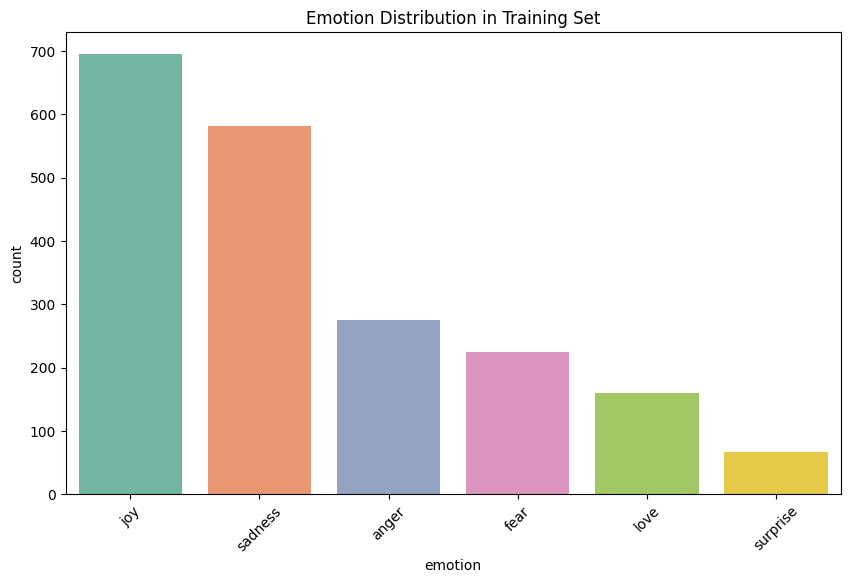

In [11]:
# visualization
# Class distribution(Bar Plot)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(x = 'emotion', data=train_df,order=train_df['emotion'].value_counts().index,palette = "Set2")
plt.title('Emotion Distribution in Training Set')
plt.xticks(rotation = 45)
plt.show()



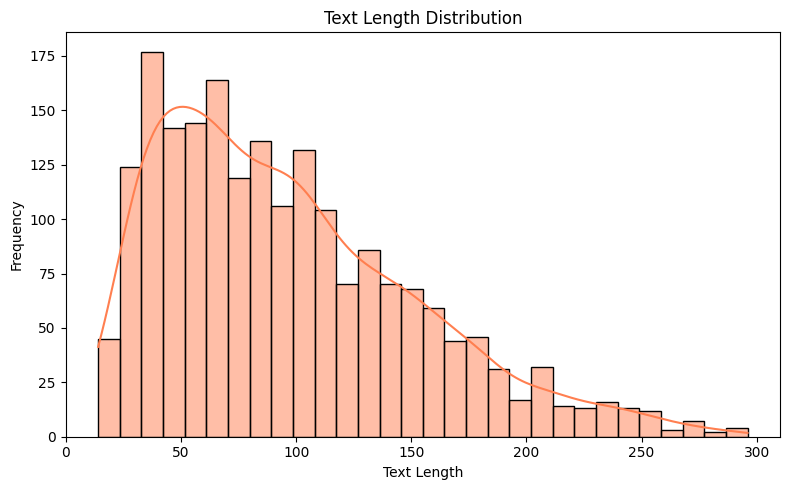

In [12]:
train_df['text_length'] = train_df['text'].str.len()

plt.figure(figsize=(8,5))
sns.histplot(train_df['text_length'], bins=30, kde=True, color='coral')
plt.title("Text Length Distribution")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

C:\Users\PRAGYA\AppData\Local\Temp\ipykernel_4092\2330410656.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='emotion', y='text_length', data=train_df, palette='coolwarm')


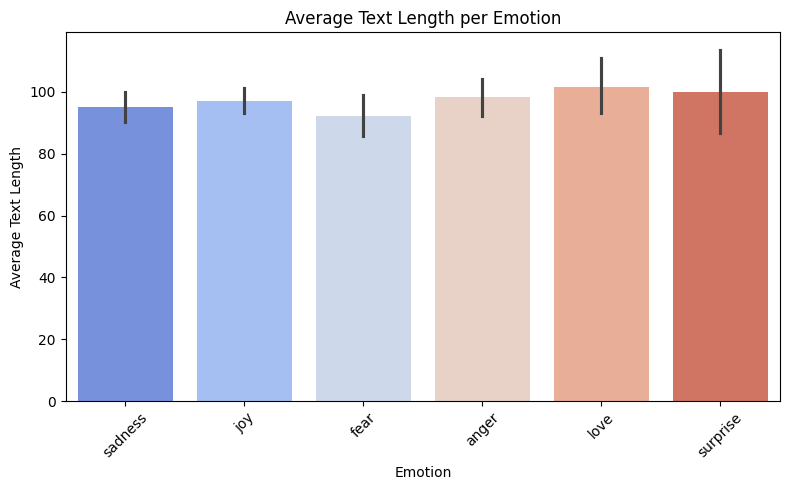

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(x='emotion', y='text_length', data=train_df, palette='coolwarm')
plt.title("Average Text Length per Emotion")
plt.xlabel("Emotion")
plt.ylabel("Average Text Length")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### ""Most frequent emotion is joy, followed by sadness. Average text length varies across emotions. No missing values, and data is relatively balanced."

In [14]:
# Label Encode Emotions
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['label'] = le.fit_transform(train_df['emotion'])
test_df['label'] = le.transform(test_df['emotion'])
valid_df['label'] = le.transform(valid_df['emotion'])

In [15]:
label_map = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_map)

{'anger': np.int64(0), 'fear': np.int64(1), 'joy': np.int64(2), 'love': np.int64(3), 'sadness': np.int64(4), 'surprise': np.int64(5)}


In [16]:
pip install transformers datasets scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [18]:
train_dataset = train_dataset.select(range(2000))  # instead of 16000
valid_dataset = valid_dataset.select(range(1000))
